<a href="https://colab.research.google.com/github/AI-in-a-Minute/Deep-Learning-Algorithms/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing a Feedforward Neural Network for CIFAR-10 Classification in Keras

In [3]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
# Loading and Preprocessing the Data

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert  class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
# Create the model
model = Sequential()

model.add(Flatten(input_shape=(32, 32, 3)))

# Hidden layers
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))


# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.2764 - loss: 1.9974 - val_accuracy: 0.3743 - val_loss: 1.7326
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.3868 - loss: 1.6985 - val_accuracy: 0.4171 - val_loss: 1.6245
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4176 - loss: 1.6162 - val_accuracy: 0.4264 - val_loss: 1.5849
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.4388 - loss: 1.5540 - val_accuracy: 0.4326 - val_loss: 1.5935
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4570 - loss: 1.5137 - val_accuracy: 0.4682 - val_loss: 1.4963
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4714 - loss: 1.4718 - val_accuracy: 0.4786 - val_loss: 1.4606
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.4760 - loss: 1.4503 - val_accuracy: 0.4727 - val_loss: 1.4830
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.4875 -

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4914 - loss: 1.4309
Test accuracy: 0.49079999327659607


In [8]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Make predictions on the test set
y_pred = model.predict(x_test)
# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


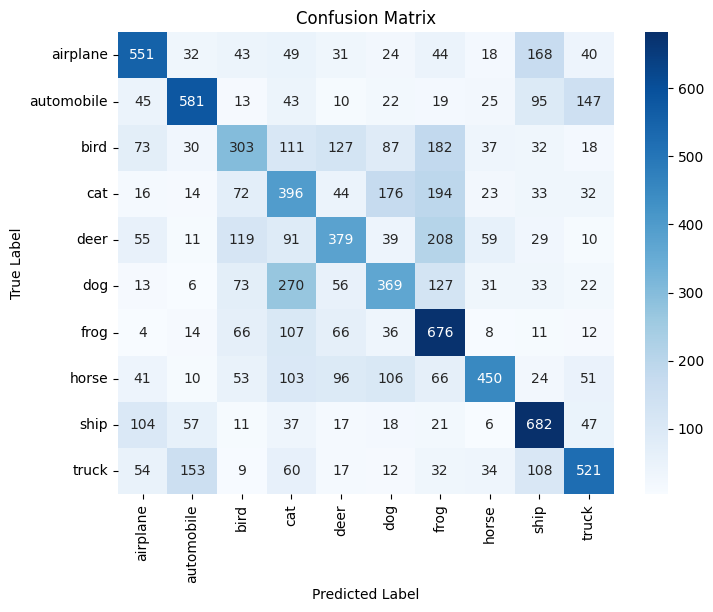

In [10]:
# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')

plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

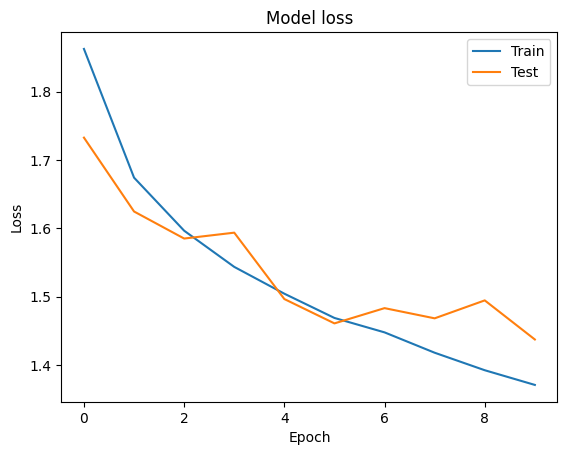

In [11]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


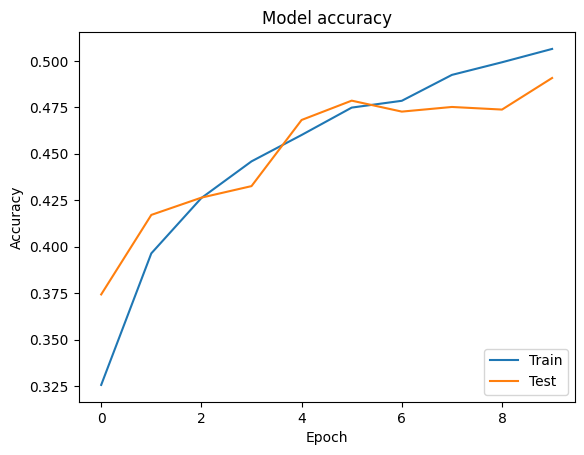

In [12]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')

plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
